# Lecture group exercise

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score #metrics for model eval for regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score #math measures 

used the following versions:

attrs==23.2.0
beautifulsoup4==4.12.3
bleach==6.1.0
colorama==0.4.6
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
DateTime==5.4
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
et-xmlfile==1.1.0
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.49.0
ipykernel==6.28.0
ipython==8.20.0
jedi==0.19.1
Jinja2==3.1.3
joblib==1.3.2
jsonschema==4.21.1
jsonschema-specifications==2023.12.1
jupyter_client==8.6.0
jupyter_core==5.7.1
jupyterlab_pygments==0.3.0
kiwisolver==1.4.5
MarkupSafe==2.1.4
matplotlib==3.8.3
matplotlib-inline==0.1.6
mistune==3.0.2
nbclient==0.9.0
nbconvert==7.14.2
nbformat==5.9.2
nest-asyncio==1.5.8
numpy==1.26.3
openpyxl==3.1.2
packaging==23.2
pandas==2.2.0
pandocfilters==1.5.1
parso==0.8.3
patsy==0.5.6
pillow==10.2.0
platformdirs==4.1.0
plotly==5.19.0
prompt-toolkit==3.0.43
psutil==5.9.7
pure-eval==0.2.2
Pygments==2.17.2
pyparsing==3.1.1
PyPDF2==3.0.1
python-dateutil==2.8.2
pytz==2024.1
pywin32==306
pyzmq==25.1.2
referencing==0.33.0
rpds-py==0.17.1
scikit-learn==1.4.1.post1
scipy==1.12.0
seaborn==0.13.2
setuptools==69.0.3
six==1.16.0
sklearn-preprocessing==0.1.0
soupsieve==2.5
stack-data==0.6.3
statsmodels==0.14.1
tenacity==8.2.3
threadpoolctl==3.3.0
tinycss2==1.2.1
tornado==6.4
traitlets==5.14.1
tzdata==2023.4
wcwidth==0.2.13
webencodings==0.5.1
zope.interface==6.1

In [175]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [7]:
#read in data
df = pd.read_csv("FloridaBikeRentals.csv",encoding="ISO-8859-1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#Check for missing values
df.isna().sum()
print(f'There are {df.isna().sum().sum()} missing values across the entire dataset.')


There are 0 missing values across the entire dataset.


Text(0.5, 1.0, 'Missing values heatmap')

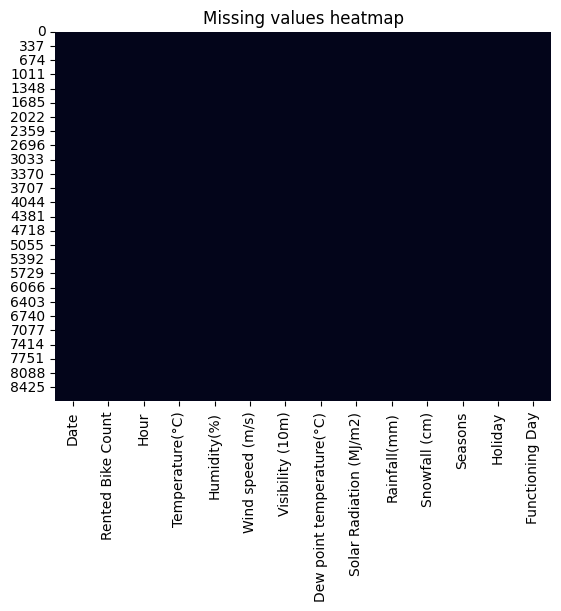

In [9]:
sns.heatmap(df.isna(),cbar=False).set_title("Missing values heatmap")
#There are no missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [30]:
#Convert Date columns to Date format and extract day, month, day of week and weekdays/weekend from date column
    #Current format: Date = MM/DD/YYYY format 

df['Date'] = pd.to_datetime(df['Date'],format='mixed')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [43]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['year'] = pd.DatetimeIndex(df['Date']).year
df['dayname'] = pd.DatetimeIndex(df['Date']).day_name()

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year,weekday,dayname
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday


In [54]:
def categorize_day(dayname): 
    if dayname in ['Saturday','Sunday']: 
        return 1
    else: 
        return 0


In [56]:
df['isweekend'] = df['dayname'].apply(categorize_day)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year,weekday,dayname,isweekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,Thursday,0


In [62]:
df.drop(columns=['weekday'])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year,dayname,isweekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,0


Observations 
- Rented Bike Count and Temperature, Hour of they day, and Dew point temperature are positively correlated 
- Temperature is correlated with what we expect: dew point temperature and solar radiation
    Temperature is also correlated with Year, which is unexpected. 

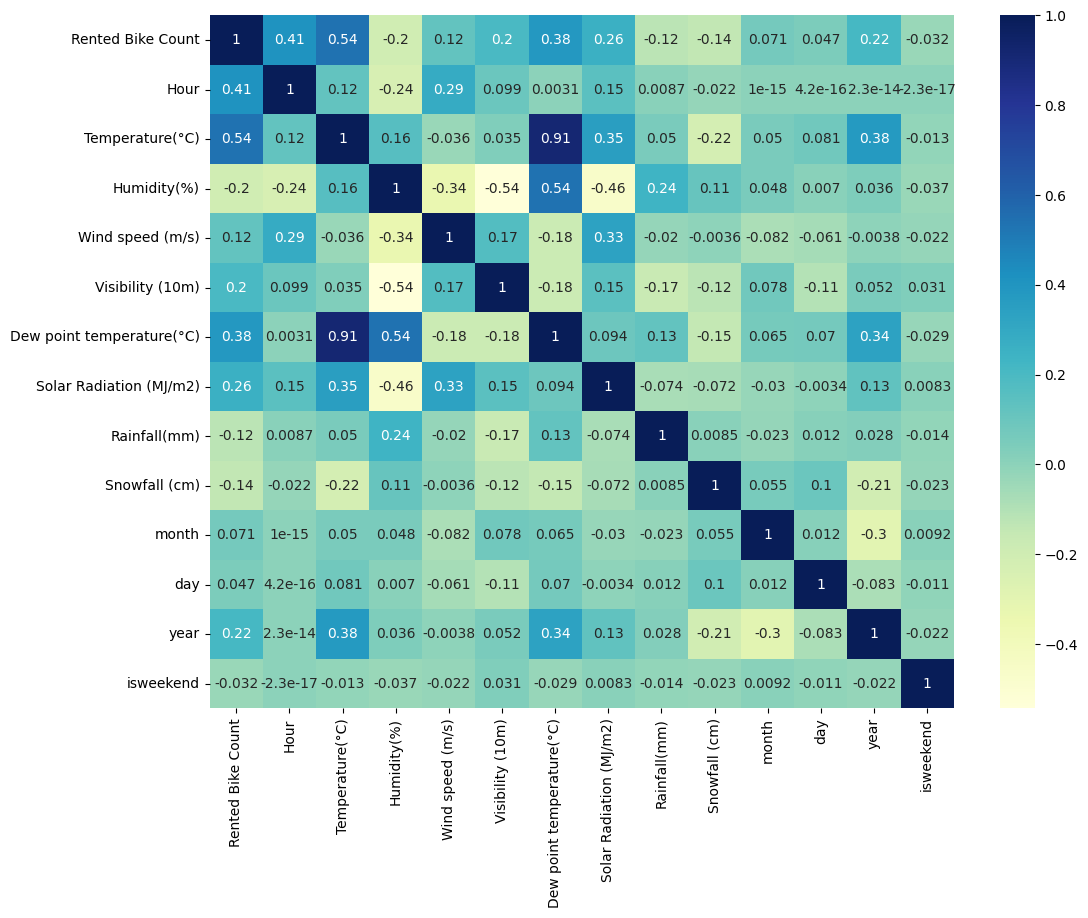

In [67]:
#Check correlation of features using a heatmap
plt.figure(figsize=(12,9))
heatmapplot = sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu",annot=True)



[Text(0.5, 1.0, 'Rented Bike Count within an hour')]

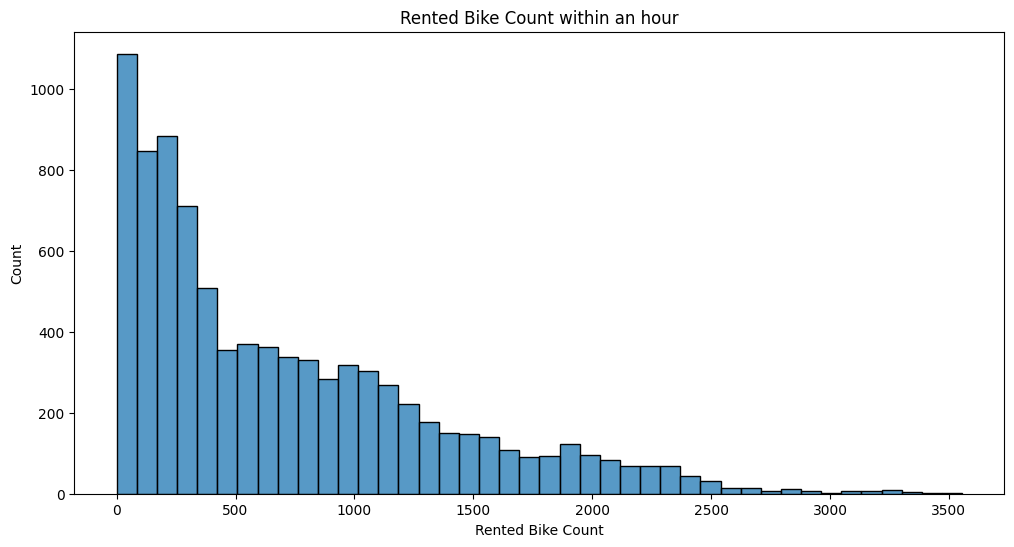

In [74]:
#Plot the distribution plot of Rented Bike Count
fig,axs = plt.subplots(ncols=1,figsize=(12,6))
sns.histplot(df,x='Rented Bike Count').set(title='Rented Bike Count within an hour')

In [ ]:
#COME BACK LATER #
#Plot the histogram of all numerical features
#fig,axs = plt.subplots(ncols=2,nrows=7,figsize=(12,6))
#axes = axes.flatten()


#EDA lecture 

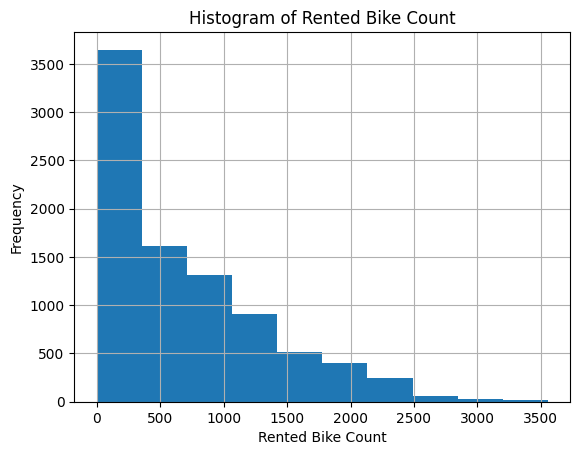

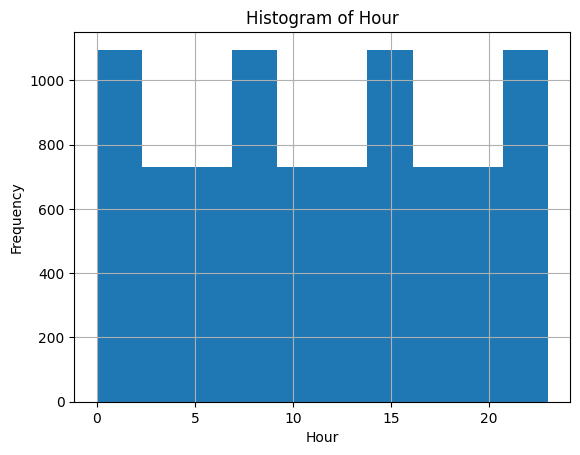

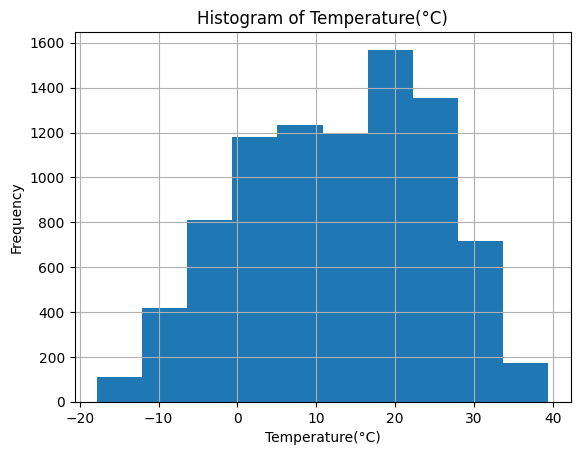

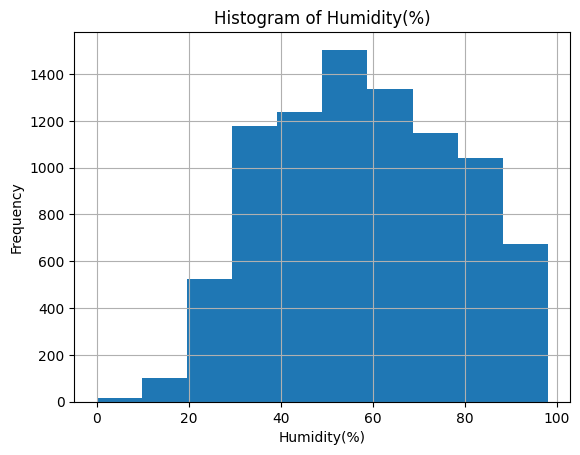

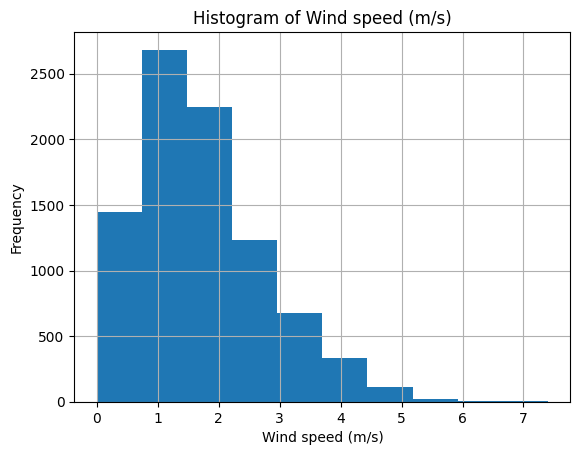

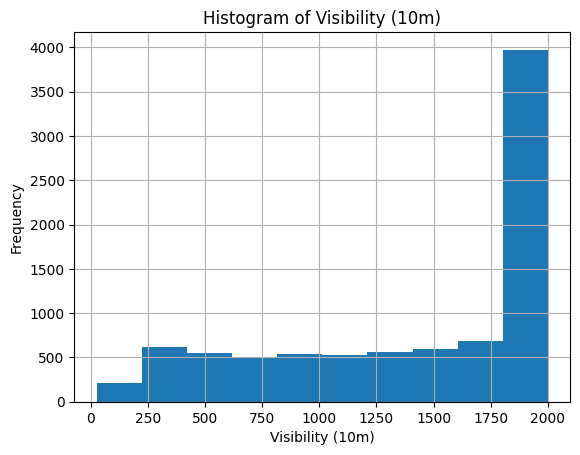

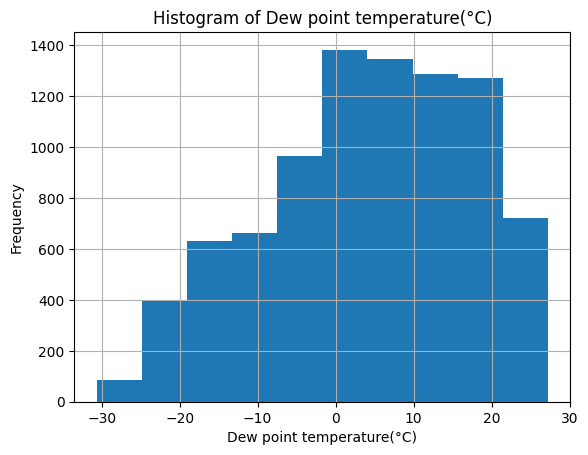

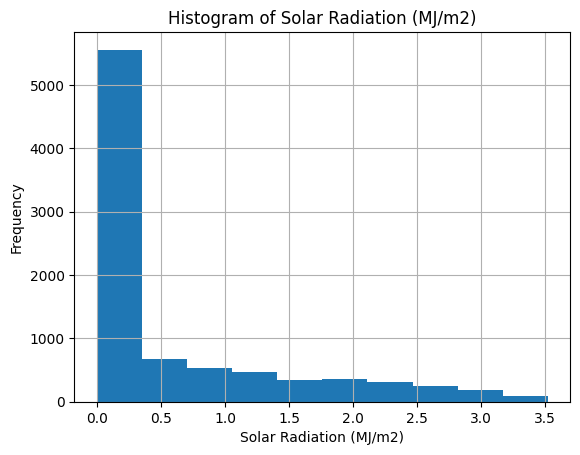

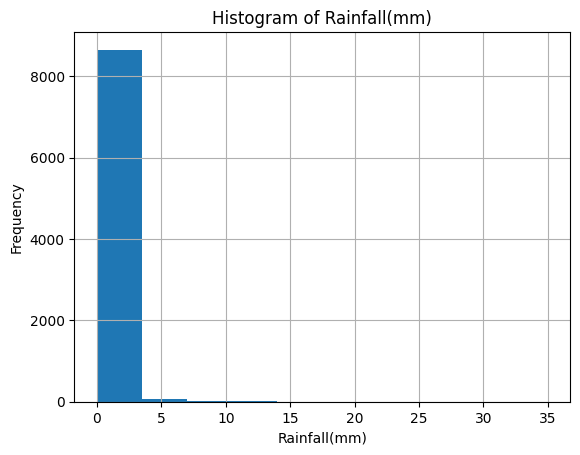

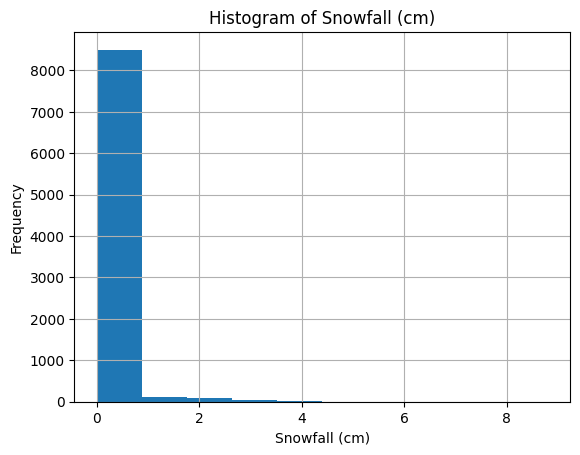

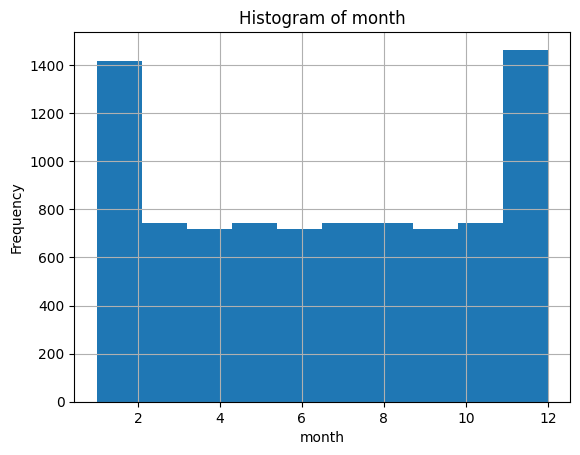

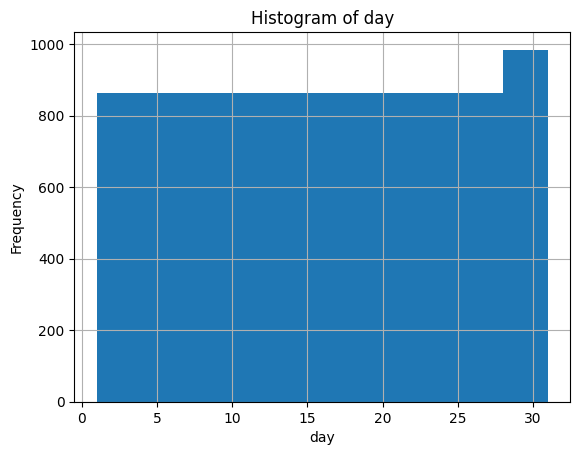

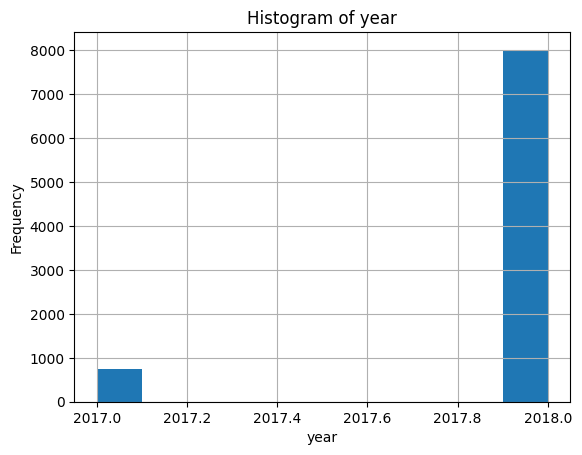

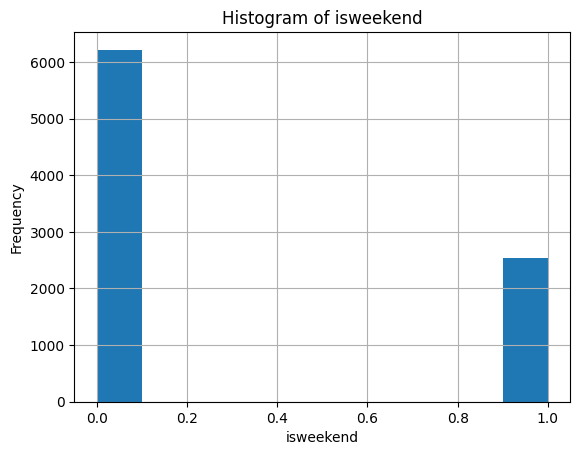

In [80]:
#Plot the histogram of all numerical features
for column in df.select_dtypes(include=['int64','float64','int32']).columns: 
    plt.figure()
    df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

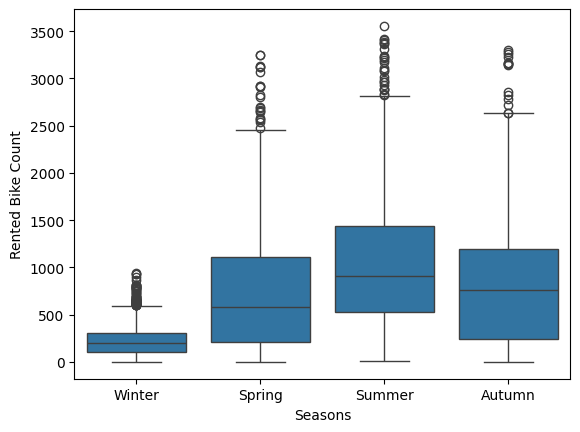

In [86]:
sns.boxplot(x=df['Seasons'],y=df['Rented Bike Count'])


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

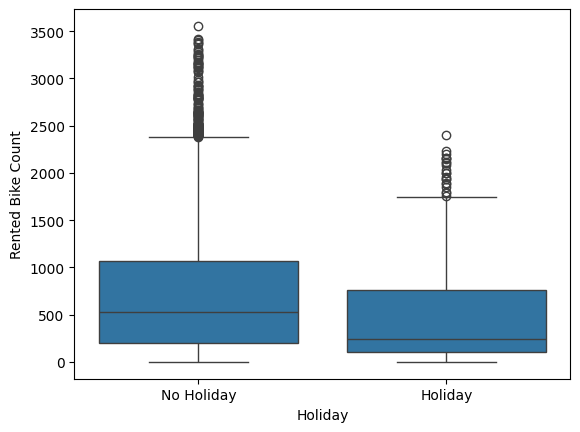

In [87]:
sns.boxplot(x=df['Holiday'],y=df['Rented Bike Count'])

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

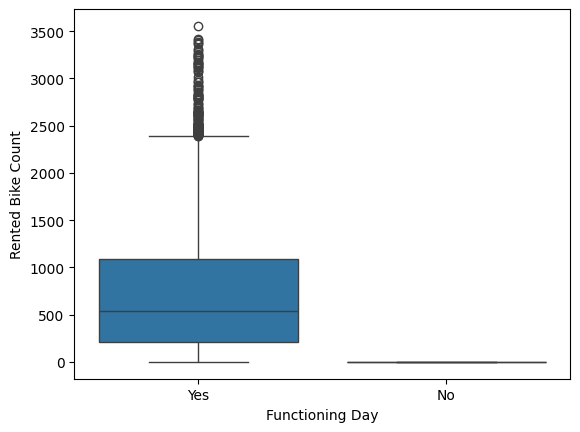

In [88]:
sns.boxplot(x=df['Functioning Day'],y=df['Rented Bike Count'])

In [ ]:
#Plot the box plot of Rented Bike Count against all the categorical features (Hint: Categorical features on X-axis and Rented Bike Count on Y-axis)
#index =0 # resetting the index to iteration
#axs = axs.flatten() 
#
#for col in df.columns:
#    sns.boxplot(data=df[col],y=col, ax=axs[index], color='lightblue')
#    index +=1 #add 1 to index to move on to next cell
#
#plt.tight_layout(pad=0.4)

Plot the Seaborn catplot of Rented Bike Count against features like Hour, Holiday, Rainfall(mm), Snowfall (cm), weekdays_weekend and give your inferences

In [90]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'day', 'year', 'weekday',
       'dayname', 'isweekend'],
      dtype='object')

In [141]:
df2 = pd.get_dummies(df,columns=['Seasons','Holiday','Functioning Day','dayname','weekday'],dtype=int)

In [142]:
df2.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'day', 'year', 'isweekend', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'dayname_Friday', 'dayname_Monday', 'dayname_Saturday',
       'dayname_Sunday', 'dayname_Thursday', 'dayname_Tuesday',
       'dayname_Wednesday', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  month                      8760 non-null   int32         
 12  day   

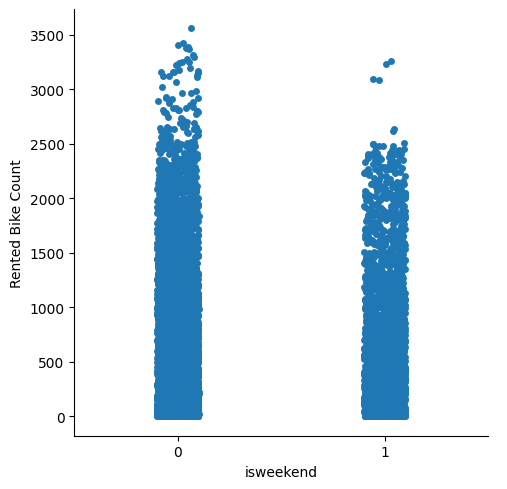

In [169]:
sns.catplot(y=df['Rented Bike Count'],x=df['isweekend'])

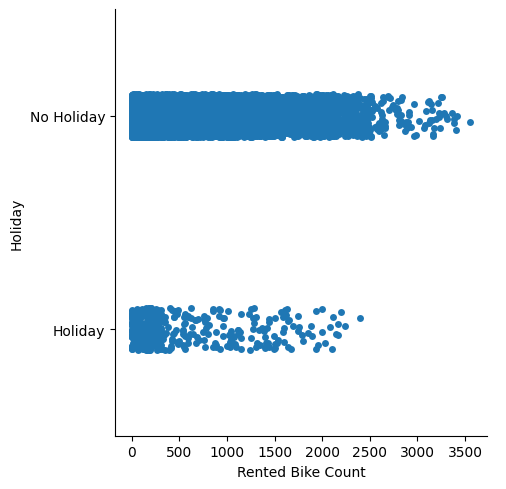

In [93]:
sns.catplot(x=df['Rented Bike Count'],y=df['Holiday'])

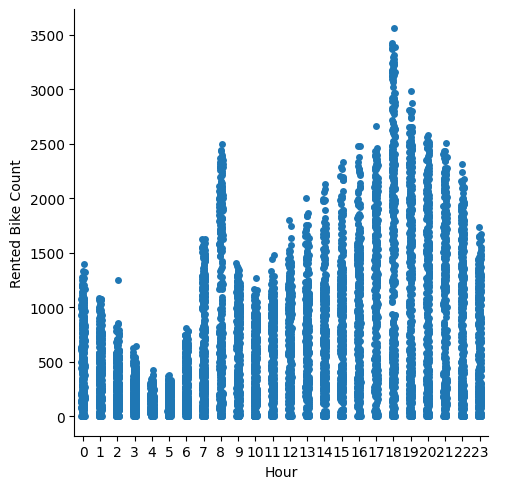

In [163]:
sns.catplot(y=df['Rented Bike Count'],x=df['Hour'])

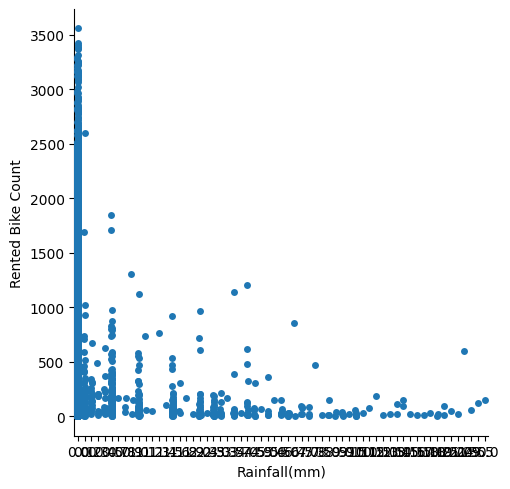

In [164]:
sns.catplot(y=df['Rented Bike Count'],x=df['Rainfall(mm)'])

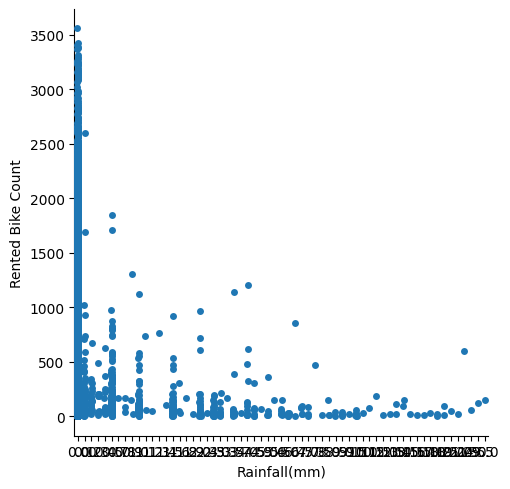

In [166]:
sns.catplot(y=df['Rented Bike Count'],x=df['Rainfall(mm)'])

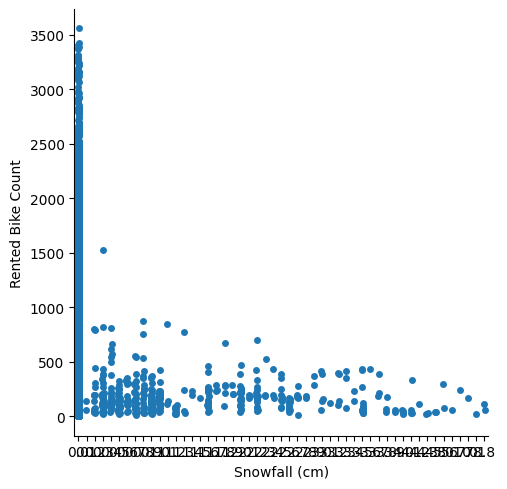

In [167]:
sns.catplot(y=df['Rented Bike Count'],x=df['Snowfall (cm)'])

Identify the target variable and split the dataset into train and test with a ratio of 75:25 and random state 1

In [148]:
x = df2.drop(["Date","Rented Bike Count"],axis=1)
y = df2['Rented Bike Count']


In [149]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,...,dayname_Thursday,dayname_Tuesday,dayname_Wednesday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,1,0,0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,1,0,0


In [150]:
ss_func = StandardScaler()
x_scaled = ss_func.fit_transform(x)
x_scaled[:20]


array([[-1.66132477, -1.51395724, -1.04248288,  0.45847578,  0.92587135,
        -1.65960467, -0.65513172, -0.13179988, -0.17189109, -1.60274527,
        -0.42296993, -3.28240667, -0.63973933, -0.57629575, -0.58051386,
        -0.58051386,  1.74801475, -0.22775689,  0.22775689, -0.18667989,
         0.18667989, -0.40301412, -0.39840954, -0.40759561, -0.41669346,
         2.45341207, -0.41215506, -0.41215506, -0.40301412, -0.39840954,
        -0.40759561, -0.41669346,  2.45341207, -0.41215506, -0.41215506],
       [-1.51686175, -1.53907415, -0.99336999, -0.8925615 ,  0.92587135,
        -1.65960467, -0.65513172, -0.13179988, -0.17189109, -1.60274527,
        -0.42296993, -3.28240667, -0.63973933, -0.57629575, -0.58051386,
        -0.58051386,  1.74801475, -0.22775689,  0.22775689, -0.18667989,
         0.18667989, -0.40301412, -0.39840954, -0.40759561, -0.41669346,
         2.45341207, -0.41215506, -0.41215506, -0.40301412, -0.39840954,
        -0.40759561, -0.41669346,  2.45341207, -0.

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=1)

Perform Standard Scaling of the train dataset. (Hint: use from sklearn.preprocessing import StandardScaler )

Perform Linear Regression, Lasso Regression and Ridge Regression for predicting the bike count required at each hour and compare the results.

In [152]:
#define each model with its hyperparameters
models = [
    {'name': 'LinearRegression','model':LinearRegression()}, #using vanilla LR
    {'name': 'RidgeRegression','model':Ridge(),'params':{'alpha':[0.01,0.1,1,10,40]}}, #alpha adjusts the intensity of the regularization
    {'name': 'LassoRegression','model':Lasso(),'params':{'alpha':[0.01,0.1,1,10,40]}},
]

In [153]:
for model_info in models: 
    print(model_info)

{'name': 'LinearRegression', 'model': LinearRegression()}
{'name': 'RidgeRegression', 'model': Ridge(), 'params': {'alpha': [0.01, 0.1, 1, 10, 40]}}
{'name': 'LassoRegression', 'model': Lasso(), 'params': {'alpha': [0.01, 0.1, 1, 10, 40]}}


In [154]:
#Perform a GridSearchCV 
for model_info in models: 
    print(f'Training: {model_info['name']}')
    GS = GridSearchCV(model_info['model'],model_info.get('params',{}),cv=5)
    GS.fit(x_train,y_train)

    #evaluate the best parameters
    best_model_par = GS.best_estimator_
    y_pred = best_model_par.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2_sc=r2_score(y_test,y_pred)

    print(f'Best parameters for model {model_info["name"]}: {GS.best_params_}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-Squared: {r2_sc:.4f}')


Training: LinearRegression
Best parameters for model LinearRegression: {}
Mean Squared Error: 185027.6393
R-Squared: 0.5500
Training: RidgeRegression
Best parameters for model RidgeRegression: {'alpha': 10}
Mean Squared Error: 184848.2068
R-Squared: 0.5504
Training: LassoRegression


c:\Users\chand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+05, tolerance: 2.206e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\chand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.718e+05, tolerance: 2.201e+05
  model = cd_fast.enet_coordinate_descent(


Best parameters for model LassoRegression: {'alpha': 0.1}
Mean Squared Error: 184944.3819
R-Squared: 0.5502


Observations: 
- Ridge regression was the best fit model. Had highest R-Squared and lowest MSE 


Linear:  
- R-Squared: 0.5500
- Mean Squared Error: 185027.6393

**Ridge:**
- R-Squared: 0.5504
- Mean Squared Error: 184848.2068

Lasso: 
- R-Squared: 0.5502
- Mean Squared Error: 184944.3819

[optional] Use the best picked model to compare train vs test to check for overfitting. (hint: use the underfitting vs overfitting exercise for guidance)

In [159]:
#Final model 

model = Ridge(alpha=1.0)
model.fit(x_train,y_train)

Ridge()

In [161]:
y_hat_train = model.predict(x_train)
train_accu = r2_score(y_train,y_hat_train)

y_hat_test = model.predict(x_test)
test_accu = r2_score(y_test,y_hat_test)

print(f'train scores:{train_accu:.3f} \ntest score:{test_accu:.3f}')

train scores:0.554 
test score:0.550
